In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [60]:
from sklearn.datasets import load_iris
raw_data = load_iris()
dir(raw_data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [61]:
df = pd.DataFrame(raw_data.data,columns = raw_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
setosa_data = df[:50]

versicolor_data = df[50:100]

virginica_data = df[100:150]

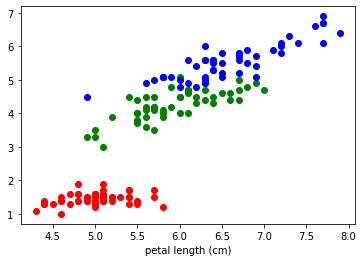

In [63]:
x_label = 'sepal length (cm)'
y_label = 'petal length (cm)'

plt.xlabel(x_label)
plt.xlabel(y_label)

plt.scatter(setosa_data[x_label],setosa_data[y_label],label = 'setosa',color = 'red')
plt.scatter(versicolor_data[x_label], versicolor_data[y_label],label = 'versicolor',color = 'green')
plt.scatter(virginica_data[x_label],virginica_data[y_label],label = 'virginica',color = 'blue')

In [78]:
model = KMeans(n_clusters = 3)
train_data = df.drop(['sepal width (cm)','petal width (cm)'],axis = 'columns')
model.fit(train_data)

KMeans(n_clusters=3)

In [79]:
y_predicted = model.predict(train_data)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [80]:
y_actual = [1 for _ in range(50)]
for _ in range(50):
    y_actual.append(2)
for _ in range(50):
    y_actual.append(0)
y_actual = np.array(y_actual)
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual,y_predicted)
cm

array([[37,  0, 13],
       [ 0, 50,  0],
       [ 4,  1, 45]], dtype=int64)

Text(69.0, 0.5, 'actual')

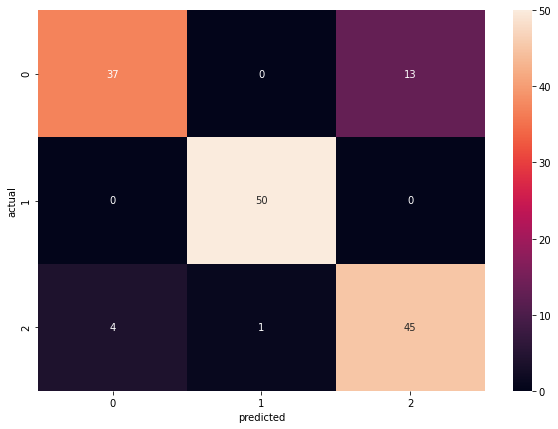

In [82]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [83]:
model.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49215686],
       [5.87413793, 4.39310345]])

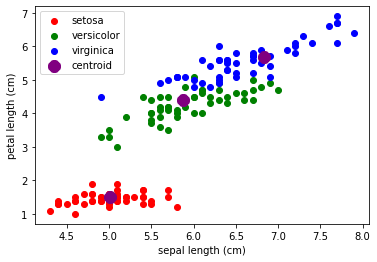

In [85]:
x_label = 'sepal length (cm)'
y_label = 'petal length (cm)'

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.scatter(setosa_data[x_label],setosa_data[y_label],label = 'setosa',color = 'red')
plt.scatter(versicolor_data[x_label], versicolor_data[y_label],label = 'versicolor',color = 'green')
plt.scatter(virginica_data[x_label],virginica_data[y_label],label = 'virginica',color = 'blue')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='P',linewidths=7,label='centroid')

plt.legend()



In [86]:
squared_error = []
k_range = range(1,10)
for i in k_range:
    model = KMeans(n_clusters=i)
    model.fit(train_data)
    squared_error.append(model.inertia_)
squared_error

[566.4937333333332,
 112.99207175925925,
 53.80997864410694,
 34.31702077922079,
 25.639459375524602,
 21.81229527879528,
 18.286852232667457,
 15.12403100595693,
 13.504849900099902]

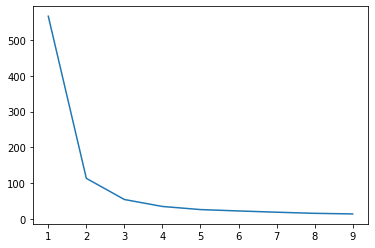

In [87]:
plt.plot(k_range,squared_error)